In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv('/content/Final_group_Assignment_MotorInsuranceFraudClaimABTFull.csv')

In [4]:
# data overview
df.head()

,ID,Insurance Type,Income of Policy Holder,Marital Status,Num Claimants,Injury Type,Overnight Hospital Stay,Claim Amount,Total Claimed,Num Claims,Num Soft Tissue,% Soft Tissue,Claim Amount Received,Fraud Flag
0,1,CI,0,NaN,2,Soft Tissue,No,1625,3250,2,2.0,1.0,0,1
1,2,CI,0,NaN,2,Back,Yes,15028,60112,1,0.0,0.0,15028,0
2,3,CI,54613,Married,1,Broken Limb,No,-99999,0,0,0.0,0.0,572,0
3,4,CI,0,NaN,3,Serious,Yes,270200,0,0,0.0,0.0,270200,0
4,5,CI,0,NaN,4,Soft Tissue,No,8869,0,0,0.0,0.0,0,1


In [5]:
df.shape

(500, 14)

## Checking Null values

In [6]:
df.isnull().sum()/len(df)*100

,0
ID,0.0
Insurance Type,0.0
Income of Policy Holder,0.0
Marital Status,66.0
Num Claimants,0.0
Injury Type,0.0
Overnight Hospital Stay,0.0
Claim Amount,0.0
Total Claimed,0.0
Num Claims,0.0


marital status has 66% values missing

In [7]:
data = df

In [8]:
data.columns

Index(['ID', 'Insurance Type ', 'Income of Policy Holder', 'Marital Status',
       'Num Claimants', 'Injury Type', 'Overnight Hospital Stay',
       'Claim Amount', 'Total Claimed', 'Num Claims', 'Num Soft Tissue',
       '% Soft Tissue', 'Claim Amount Received', 'Fraud Flag'],
      dtype='object')

In [9]:
data.drop('ID', axis = 1,inplace =  True)

In [10]:
print("Summary Statistics")
data.describe()

Summary Statistics


,Income of Policy Holder,Num Claimants,Claim Amount,Total Claimed,Num Claims,Num Soft Tissue,% Soft Tissue,Claim Amount Received,Fraud Flag
count,500.000000,500.000000,500.00000,500.00000,500.000000,490.000000,500.000000,500.000000,500.000000
mean,13739.994000,1.908000,16373.20400,9597.18600,0.798000,0.234694,0.172012,13051.942000,0.336000
std,20081.535489,1.012713,29426.27696,35655.68622,2.666724,0.589635,0.428015,30547.194864,0.472812
min,0.000000,1.000000,-99999.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,3322.25000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.000000,5663.00000,0.00000,0.000000,0.000000,0.000000,3253.500000,0.000000
75%,33918.500000,3.000000,12245.50000,11282.75000,1.000000,0.000000,0.000000,8191.750000,1.000000
max,71284.000000,4.000000,270200.00000,729792.00000,56.000000,5.000000,2.000000,295303.000000,1.000000


For the missing values ->
1. Marital Status = there is significant amount of missing values so we have replaced that with 'Unknown'
2. Num Soft Tissues has relatively less no of missing values so we replace them with median as its less impacted by outliers

In [11]:

data['Marital Status'].fillna('Unknown', inplace=True)
data['Num Soft Tissue'].fillna(data['Num Soft Tissue'].median(), inplace=True)

In [12]:
data.isnull().sum()

,0
Insurance Type,0
Income of Policy Holder,0
Marital Status,0
Num Claimants,0
Injury Type,0
Overnight Hospital Stay,0
Claim Amount,0
Total Claimed,0
Num Claims,0
Num Soft Tissue,0


Fraud Flag Distribution

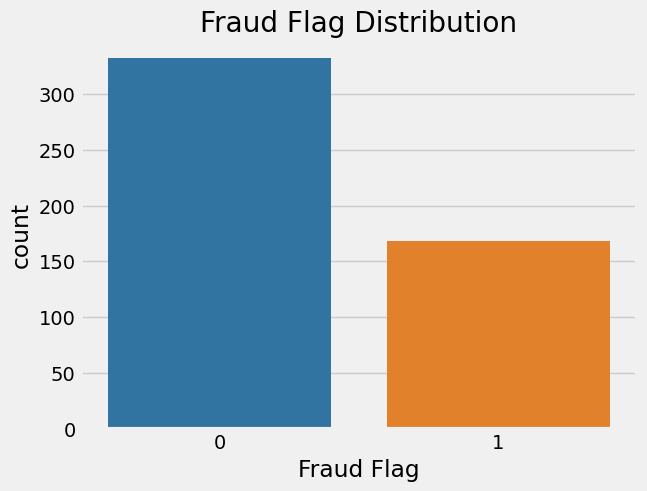

In [13]:
sns.countplot(x = 'Fraud Flag', data = df, palette = 'tab10')
plt.title('Fraud Flag Distribution')
plt.show()

In [14]:
df['Fraud Flag'].value_counts()

,count
Fraud Flag,
0,332
1,168


In [15]:
cont = ['Income of Policy Holder','Claim Amount','Total Claimed','Claim Amount Received']

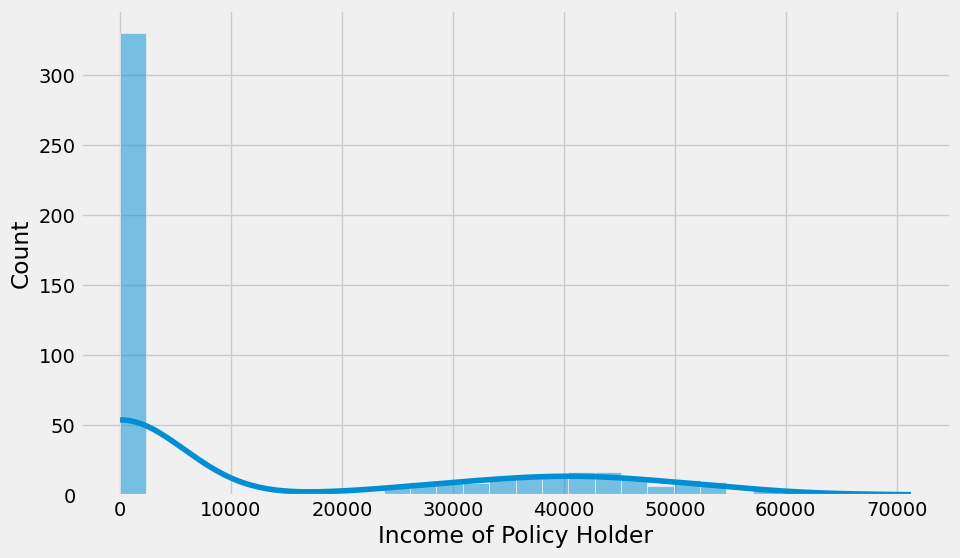

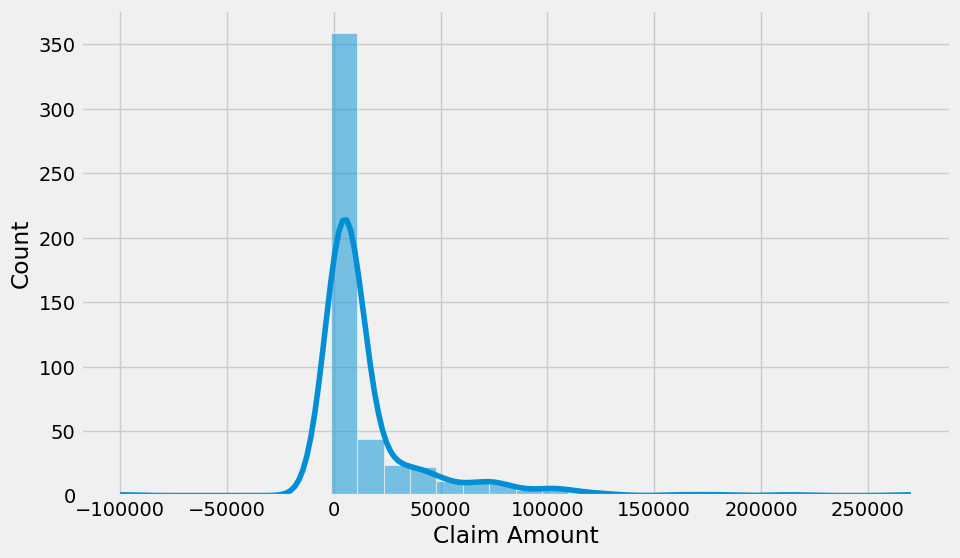

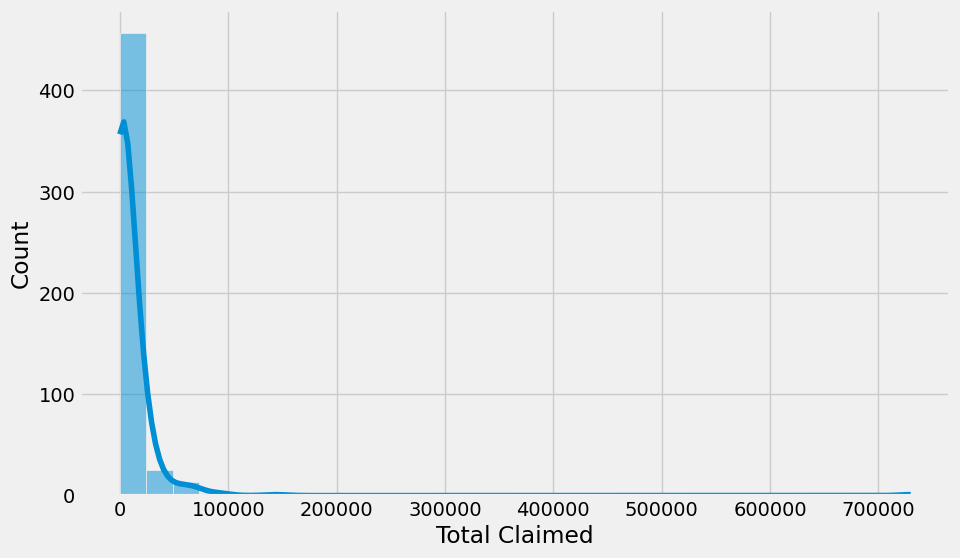

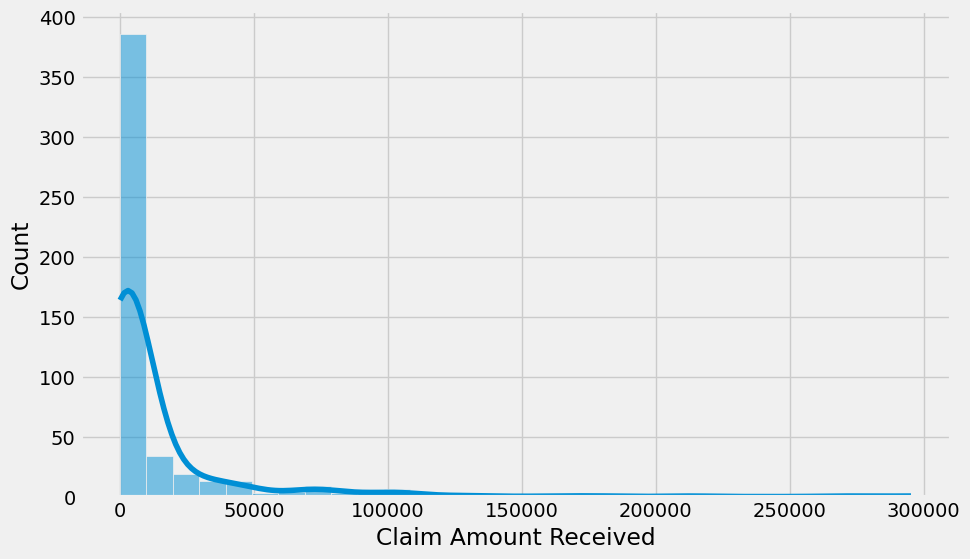

In [16]:
for col in cont:
  plt.figure(figsize = (10,6))
  sns.histplot(data[col], kde = True, bins = 30)
  plt.show()

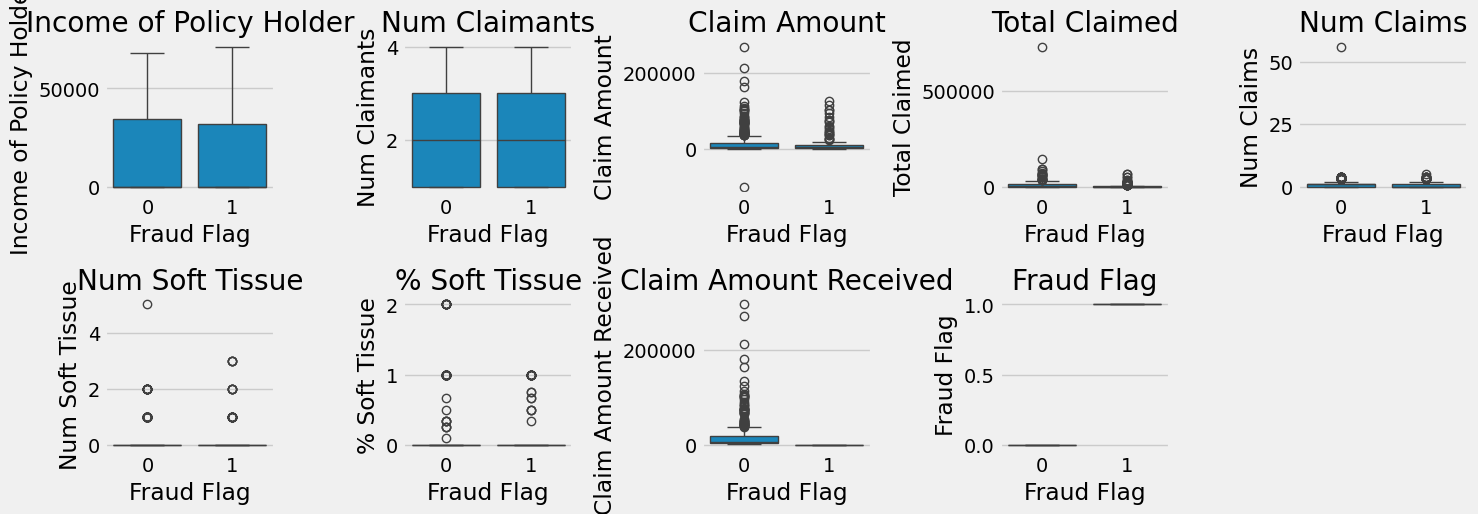

In [17]:
# Boxplots to visualize outliers
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns):
    plt.subplot(4, 5, i + 1)
    sns.boxplot(y = column,x = 'Fraud Flag', data = data)
    plt.title(column)
plt.tight_layout()
plt.show()

## Observations

Outlier treatment

In [18]:
# Outlier treatment using IQR (example)
for col in numerical_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
    data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])

In [19]:
data.columns

Index(['Insurance Type ', 'Income of Policy Holder', 'Marital Status',
       'Num Claimants', 'Injury Type', 'Overnight Hospital Stay',
       'Claim Amount', 'Total Claimed', 'Num Claims', 'Num Soft Tissue',
       '% Soft Tissue', 'Claim Amount Received', 'Fraud Flag'],
      dtype='object')

In [20]:
data_new = data[['Insurance Type ', 'Income of Policy Holder', 'Marital Status',
       'Num Claimants', 'Injury Type', 'Overnight Hospital Stay',
       'Claim Amount', 'Total Claimed', 'Num Claims','Claim Amount Received', 'Fraud Flag']]

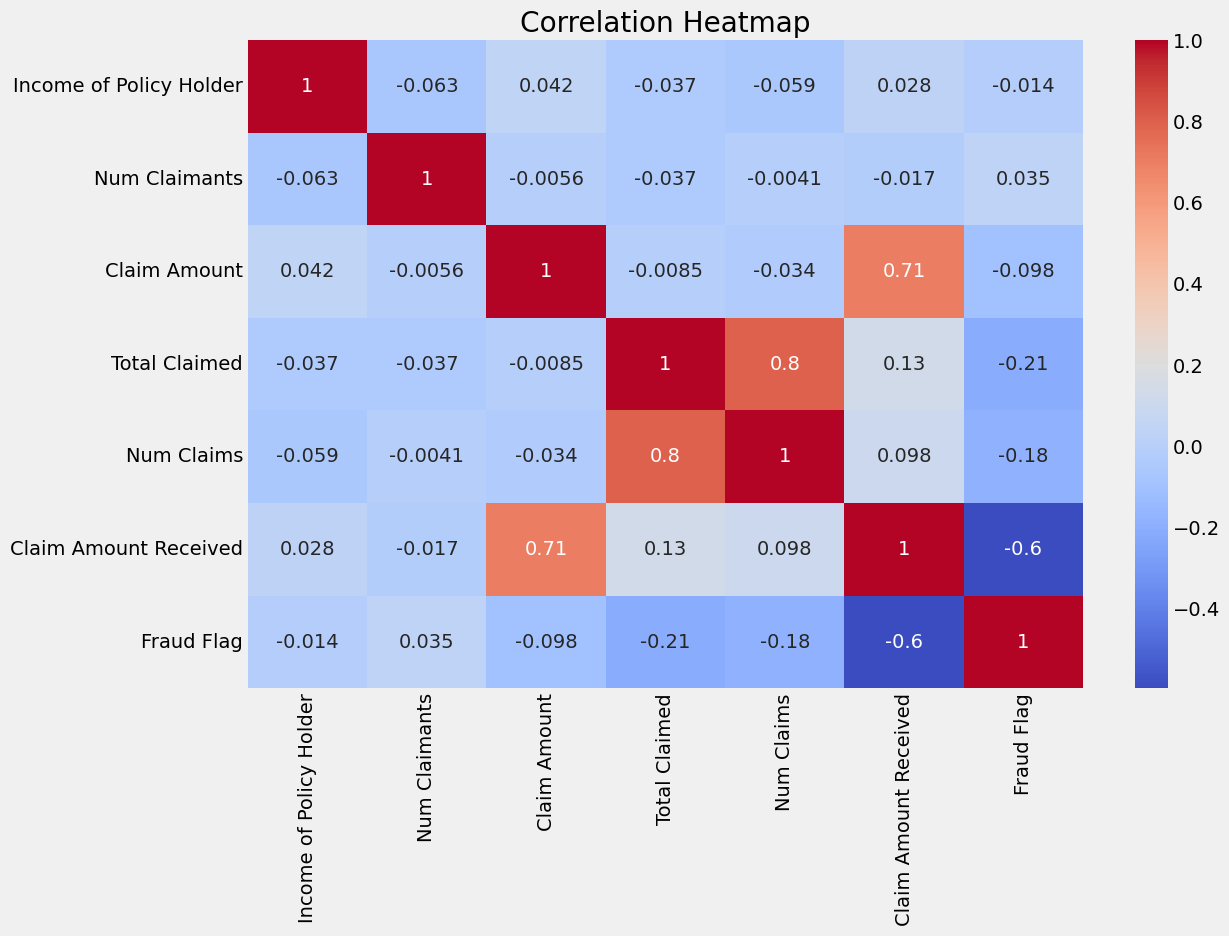

In [21]:
# Heatmap of correlations
plt.figure(figsize=(12, 8))
correlation_matrix = data_new.corr(numeric_only = True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [22]:
correlation_matrix

,Income of Policy Holder,Num Claimants,Claim Amount,Total Claimed,Num Claims,Claim Amount Received,Fraud Flag
Income of Policy Holder,1.000000,-0.063393,0.042054,-0.037177,-0.058795,0.028049,-0.013792
Num Claimants,-0.063393,1.000000,-0.005621,-0.037001,-0.004107,-0.016786,0.035391
Claim Amount,0.042054,-0.005621,1.000000,-0.008467,-0.034435,0.705108,-0.098156
Total Claimed,-0.037177,-0.037001,-0.008467,1.000000,0.799986,0.131279,-0.214826
Num Claims,-0.058795,-0.004107,-0.034435,0.799986,1.000000,0.097684,-0.181022
Claim Amount Received,0.028049,-0.016786,0.705108,0.131279,0.097684,1.000000,-0.596422
Fraud Flag,-0.013792,0.035391,-0.098156,-0.214826,-0.181022,-0.596422,1.000000


In [24]:
target_column = 'Fraud Flag'

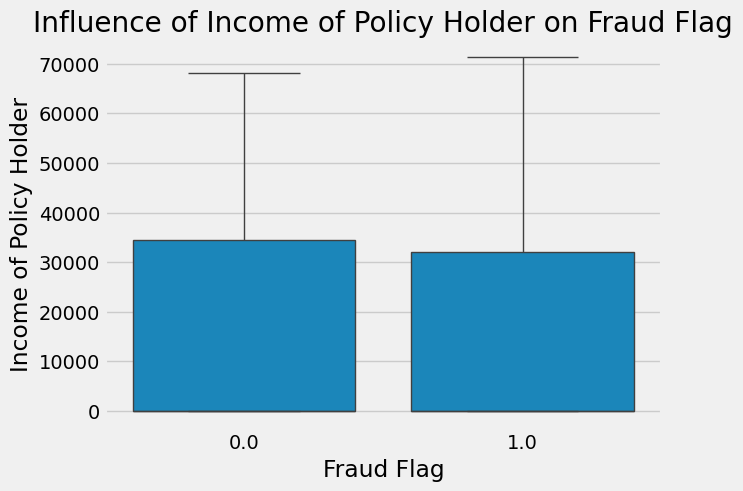

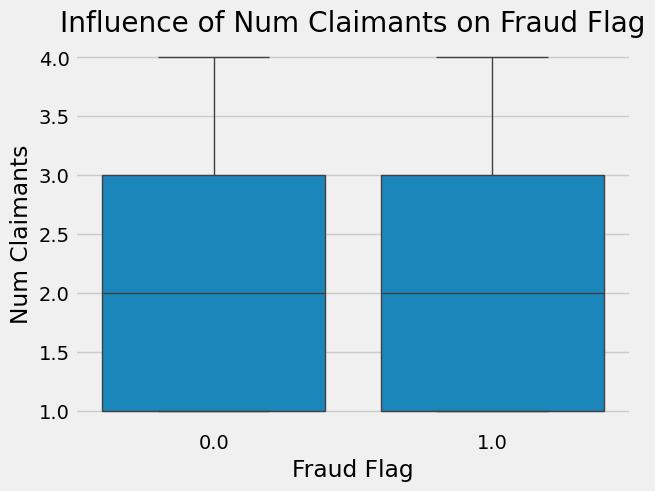

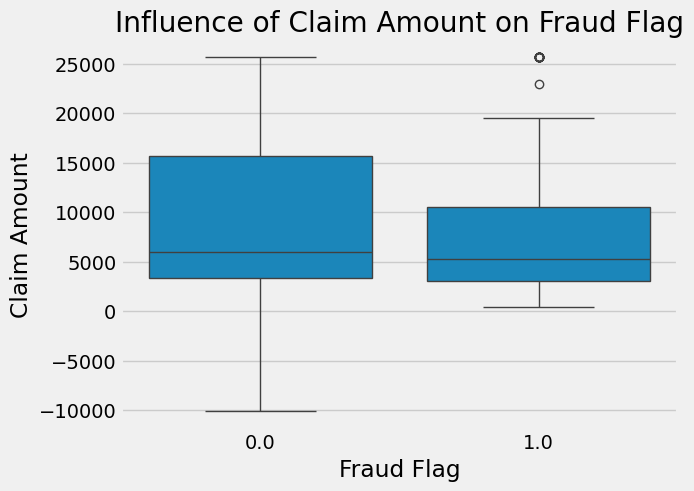

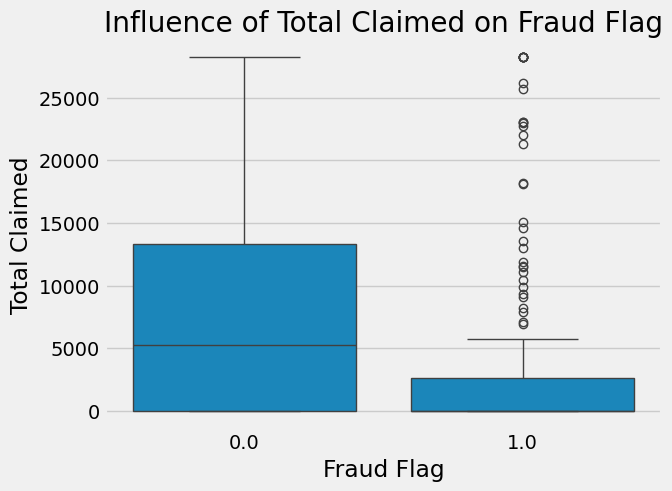

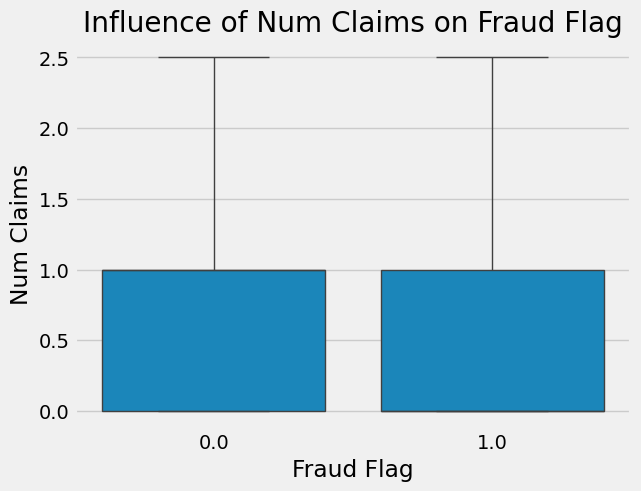

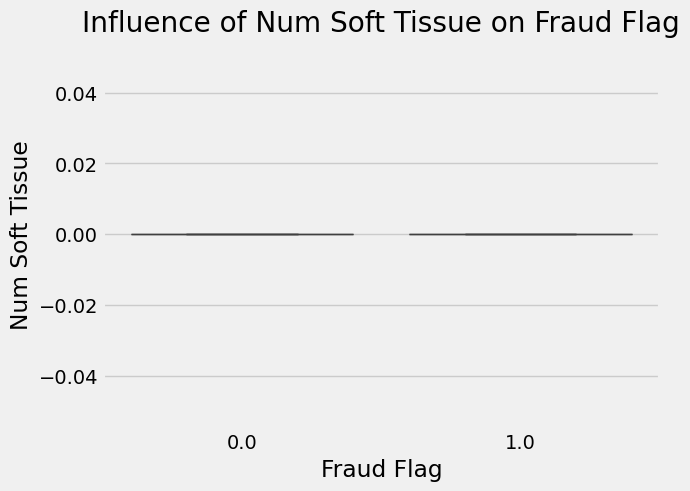

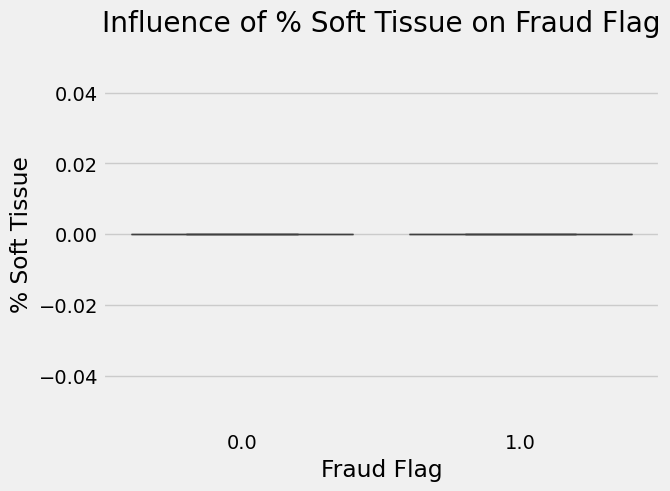

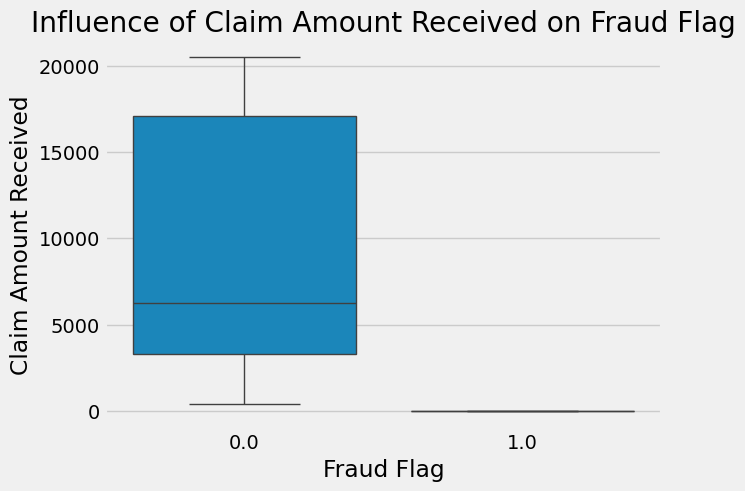

In [25]:
for col in numerical_columns:
    if col != target_column:
        sns.boxplot(x=target_column, y=col, data=data)
        plt.title(f'Influence of {col} on {target_column}')
        plt.show()



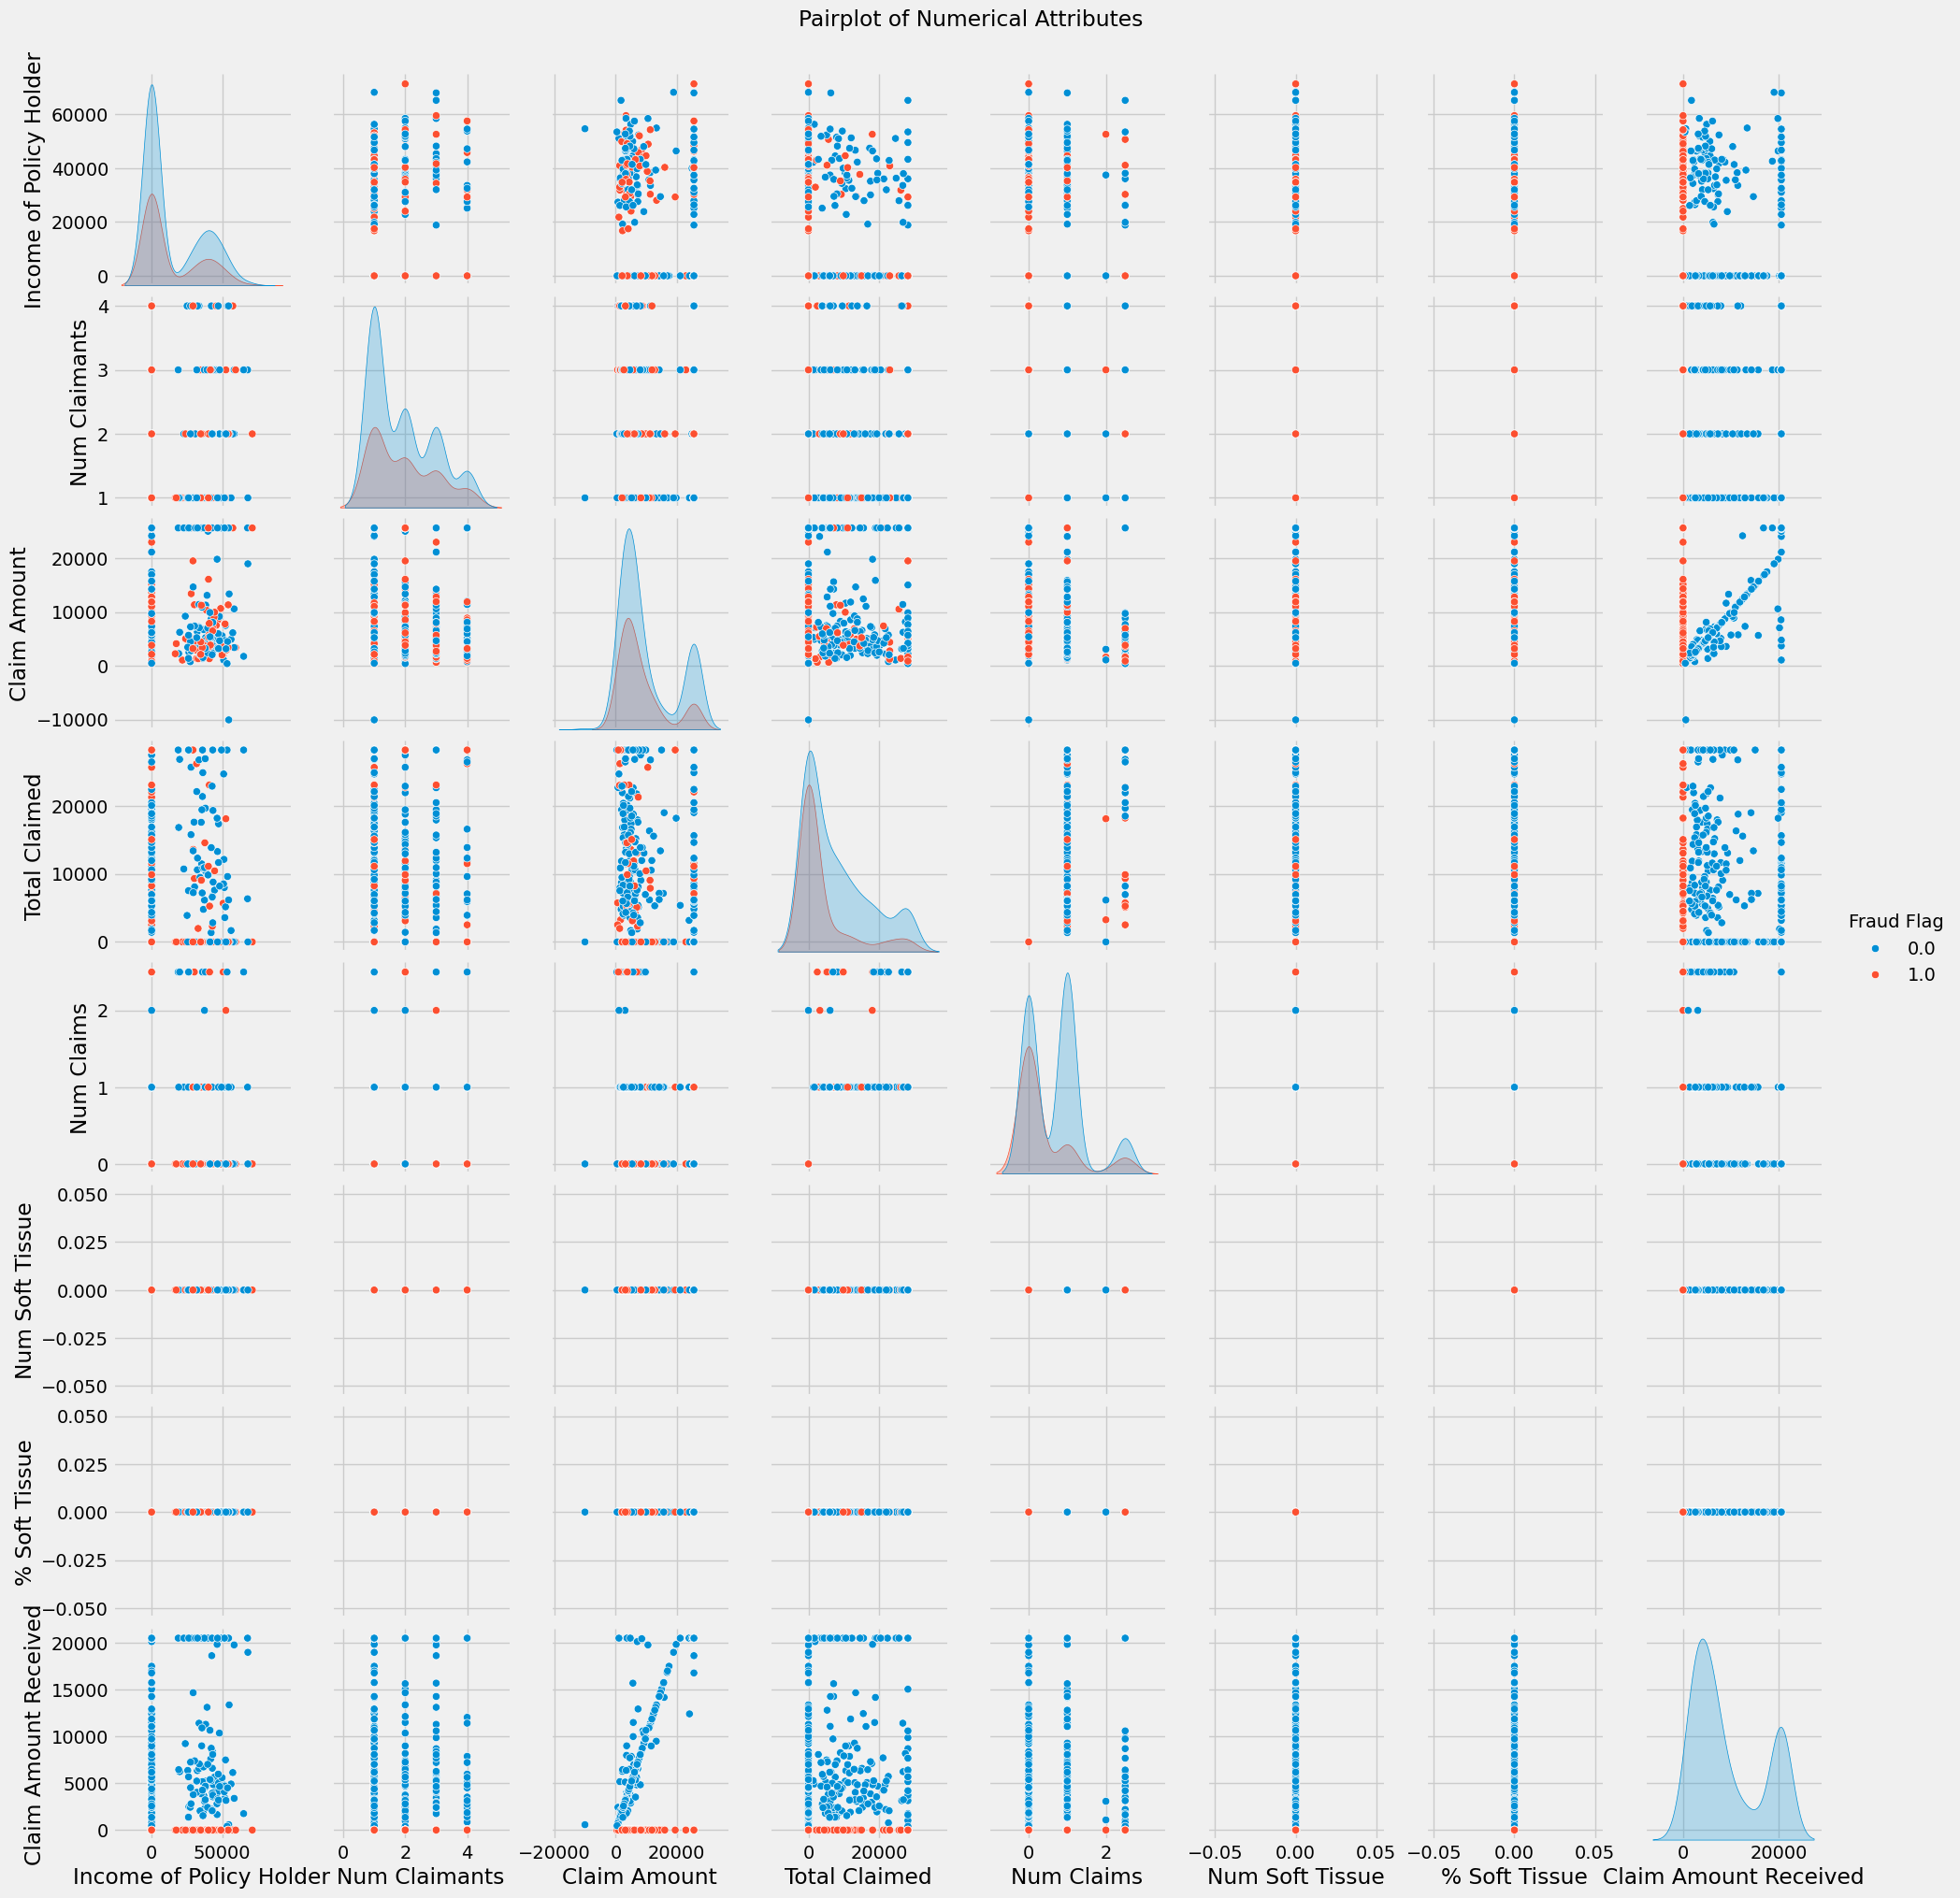

In [26]:
sns.pairplot(data, hue=target_column)
plt.suptitle('Pairplot of Numerical Attributes', y=1.02)
plt.show()

## Pairplot Observations:

1. Diagonal Analysis -

Income of Policy holder, Claim amount, total claim for all these attricbutes from their kde plot we can observe significant overalp between the 2 classes which indicates that these are not very good features for segregating the
classes

2. Off Diagonal Analysis-

Claim amount and Claim amount received shows a strong postive almost linear relation

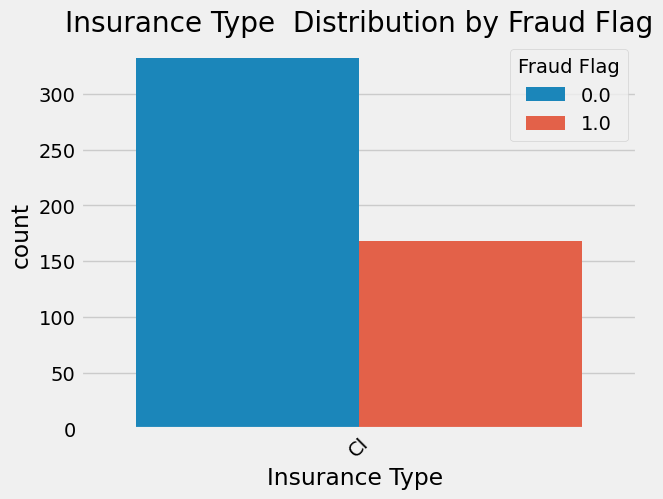

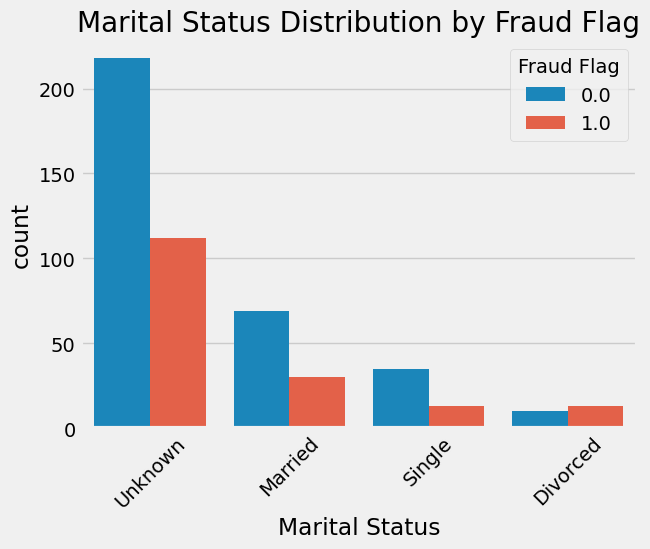

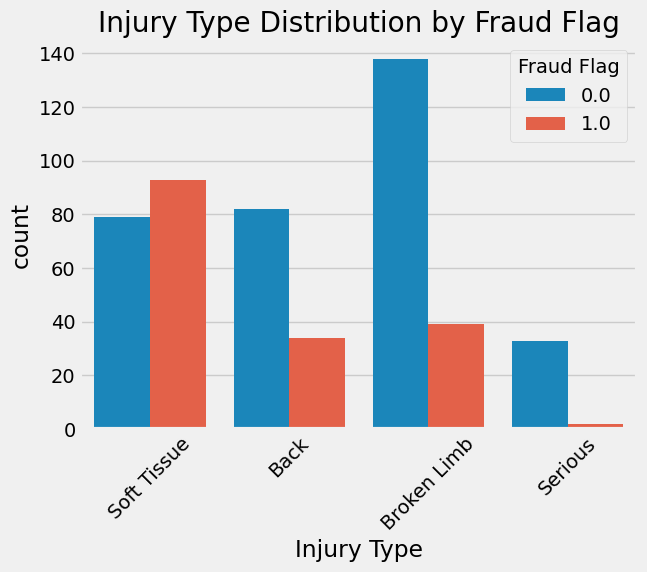

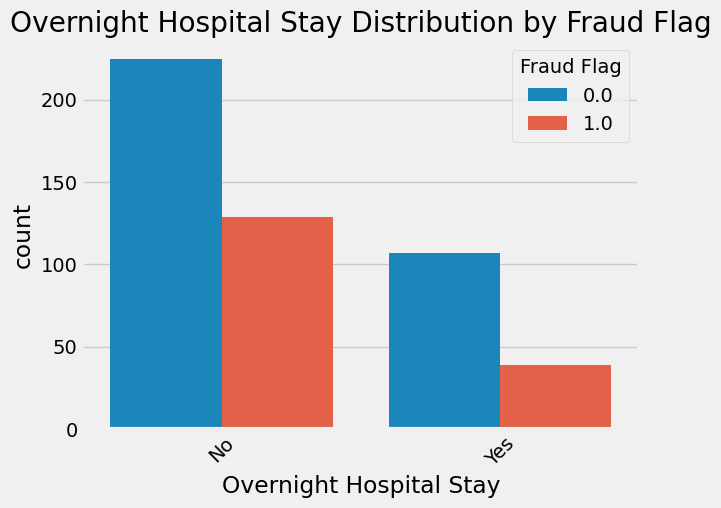

In [27]:
# Categorical attributes analysis
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
for col in categorical_columns:
    sns.countplot(x=col, hue=target_column, data=data)
    plt.title(f'{col} Distribution by {target_column}')
    plt.xticks(rotation=45)
    plt.show()



In [28]:
# Step 9: Feature Importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Prepare data for modeling
X = data.drop(columns=[target_column])
X = pd.get_dummies(X, drop_first=True)  # One-hot encode categorical variables
y = data[target_column]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Fit a Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Feature Importance
                        Feature  Importance
7         Claim Amount Received    0.770437
2                  Claim Amount    0.047174
13      Injury Type_Soft Tissue    0.044150
3                 Total Claimed    0.040203
4                    Num Claims    0.026131
0       Income of Policy Holder    0.018929
1                 Num Claimants    0.014779
11      Injury Type_Broken Limb    0.012316
12          Injury Type_Serious    0.007249
14  Overnight Hospital Stay_Yes    0.006130


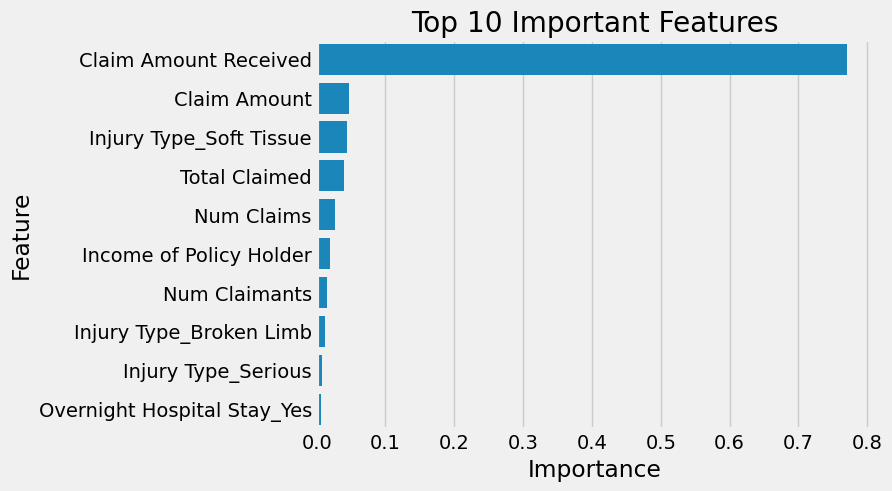

In [30]:
# Feature importance
importances = rf.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importance")
print(feature_importance_df.head(10))

# Step 10: Visualization of Feature Importance
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Important Features')
plt.show()